In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("12-health_risk_classification.csv")

In [3]:
df.head()

,bmi_score,blood_pressure_variation,activity_level_index,high_risk_flag
0,0.564223,0.652825,1.262925,1
1,-1.692569,2.981229,-0.180331,1
2,0.770383,0.400475,1.365806,1
3,2.135007,0.150832,3.084596,0
4,0.360342,1.026132,1.251574,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bmi_score                 1000 non-null   float64
 1   blood_pressure_variation  1000 non-null   float64
 2   activity_level_index      1000 non-null   float64
 3   high_risk_flag            1000 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 31.4 KB


In [5]:
df.describe()

,bmi_score,blood_pressure_variation,activity_level_index,high_risk_flag
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.023702,0.016769,-0.020771,0.498000
std,1.203694,1.268761,1.392738,0.500246
min,-4.743951,-2.587178,-4.999018,0.000000
25%,-0.796655,-0.981320,-1.057938,0.000000
50%,0.142105,-0.317137,0.204506,0.000000
75%,0.956225,1.017388,1.061181,1.000000
max,2.321480,3.954873,3.477210,1.000000


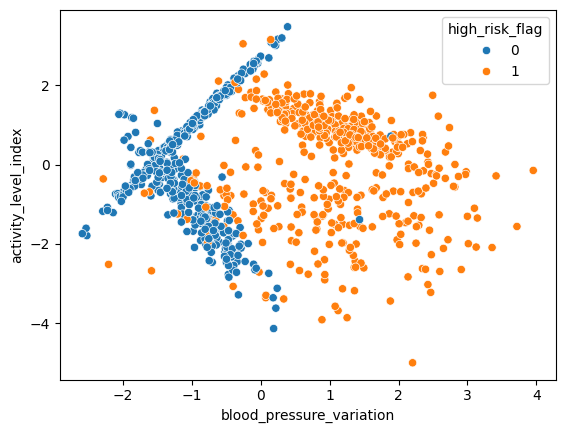

In [7]:
sns.scatterplot(x=df["blood_pressure_variation"], y=df["activity_level_index"], hue=df["high_risk_flag"])

plt.show()

In [8]:
df["high_risk_flag"].value_counts()

high_risk_flag
0    502
1    498
Name: count, dtype: int64

In [9]:
X = df.drop("high_risk_flag", axis=1)

y = df["high_risk_flag"]

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

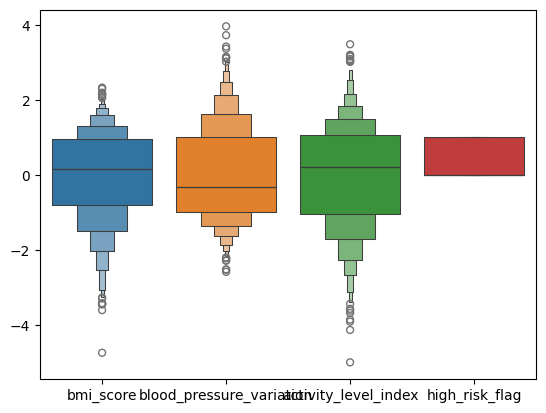

In [12]:
sns.boxenplot(df)

plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler 

In [14]:
scaler = StandardScaler()

In [15]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
classifier = KNeighborsClassifier(n_neighbors=5, algorithm="auto", weights="uniform")

In [19]:
classifier.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [20]:
y_pred = classifier.predict(X_test)

In [21]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [22]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:\n", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[124   2]
 [ 10 114]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       126
           1       0.98      0.92      0.95       124

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250


Accuracy Score:
 0.952


In [23]:
classifier = KNeighborsClassifier(n_neighbors=5, algorithm="auto", weights="distance")

In [24]:
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:\n", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[123   3]
 [ 10 114]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       126
           1       0.97      0.92      0.95       124

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250


Accuracy Score:
 0.948


In [25]:
#Regression

In [26]:
df = pd.read_csv("12-house_energy_regression.csv")

In [27]:
df.head()

,avg_indoor_temp_change,outdoor_humidity_level,daily_energy_consumption_kwh
0,-0.167118,0.146714,-14.996950
1,-0.020902,0.117327,-12.678089
2,0.150419,0.364961,17.775455
3,0.555604,0.089581,6.661465
4,0.058209,-1.142970,-14.195530


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   avg_indoor_temp_change        1000 non-null   float64
 1   outdoor_humidity_level        1000 non-null   float64
 2   daily_energy_consumption_kwh  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [29]:
df.describe()

,avg_indoor_temp_change,outdoor_humidity_level,daily_energy_consumption_kwh
count,1000.000000,1000.000000,1000.000000
mean,0.033186,0.056982,1.766025
std,0.961603,1.014959,41.299085
min,-3.241267,-2.940389,-132.797922
25%,-0.611581,-0.651418,-25.600072
50%,0.036043,0.047742,1.065474
75%,0.648317,0.714886,28.766573
max,3.078881,3.852731,138.577662


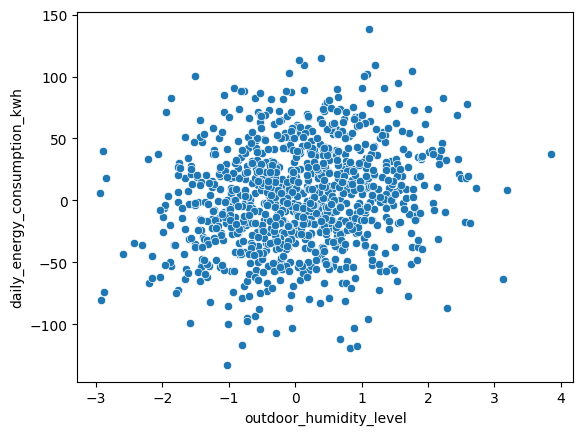

In [31]:
sns.scatterplot(x=df["outdoor_humidity_level"], y=df["daily_energy_consumption_kwh"])

plt.show()

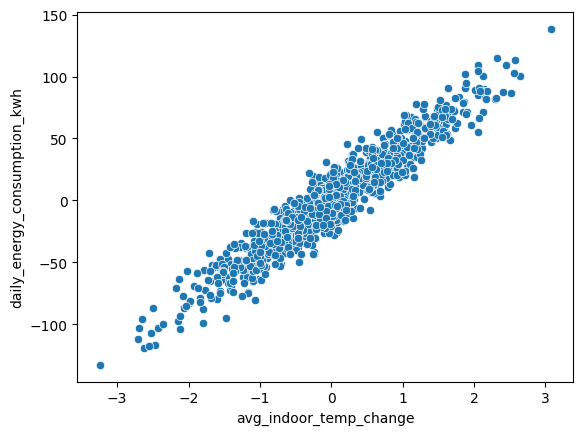

In [32]:
sns.scatterplot(x=df["avg_indoor_temp_change"], y=df["daily_energy_consumption_kwh"])

plt.show()

In [33]:
df.corr()

,avg_indoor_temp_change,outdoor_humidity_level,daily_energy_consumption_kwh
avg_indoor_temp_change,1.000000,0.002584,0.956682
outdoor_humidity_level,0.002584,1.000000,0.169557
daily_energy_consumption_kwh,0.956682,0.169557,1.000000


In [34]:
X = df.drop("daily_energy_consumption_kwh", axis=1)

y = df["daily_energy_consumption_kwh"]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

In [37]:
scaler = StandardScaler()

In [38]:
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [39]:
from sklearn.neighbors import KNeighborsRegressor

In [40]:
regressor = KNeighborsRegressor(n_neighbors=5, algorithm="auto", weights="uniform")

In [41]:
regressor.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [42]:
y_pred = regressor.predict(X_test)

In [44]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [46]:
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

R2 Score: 0.9152685146562609
Mean Absolute Error: 9.42143518926242
Mean Squared Error: 140.40201685069158


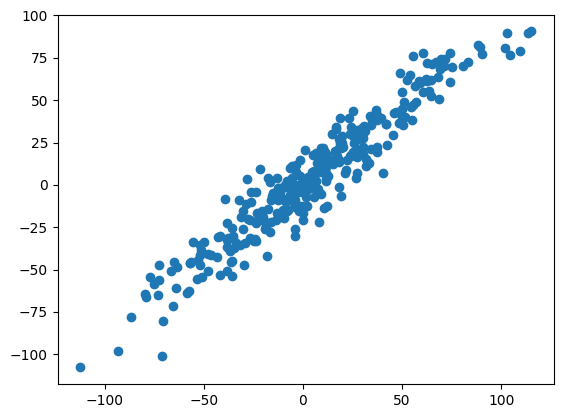

In [47]:
plt.scatter(y_test, y_pred)

plt.show()

R2 Score: 0.9164863388635838
Mean Absolute Error: 9.331428506491209
Mean Squared Error: 138.3840541750219


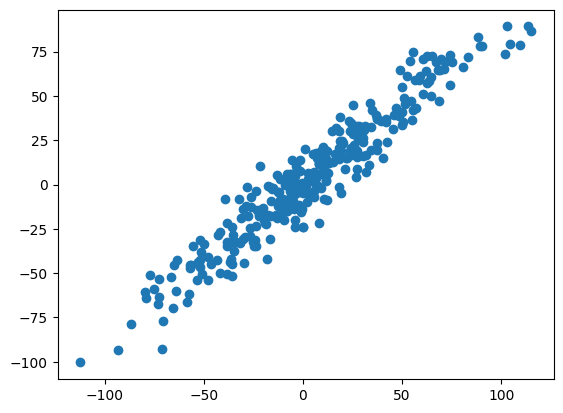

In [48]:
regressor = KNeighborsRegressor(n_neighbors=7, algorithm="auto", weights="uniform")

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

plt.scatter(y_test, y_pred)

plt.show()

R2 Score: 0.9173965678784325
Mean Absolute Error: 9.217082380082838
Mean Squared Error: 136.87578379639785


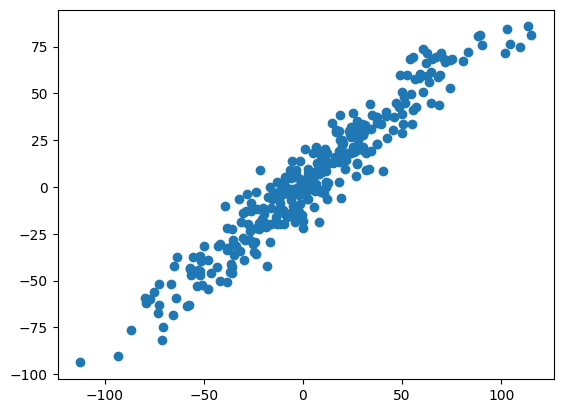

In [49]:
regressor = KNeighborsRegressor(n_neighbors=10, algorithm="auto", weights="uniform")

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

plt.scatter(y_test, y_pred)

plt.show()

R2 Score: 0.9180878077711156
Mean Absolute Error: 9.208552241804677
Mean Squared Error: 135.73038342171242


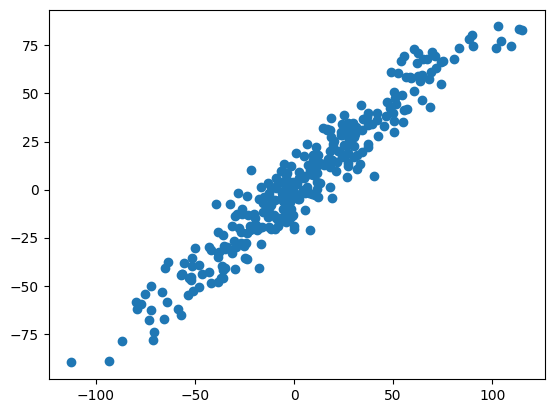

In [52]:
regressor = KNeighborsRegressor(n_neighbors=11, algorithm="auto", weights="uniform")

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

plt.scatter(y_test, y_pred)

plt.show()

R2 Score: 0.9180878077711156
Mean Absolute Error: 9.208552241804677
Mean Squared Error: 135.73038342171242


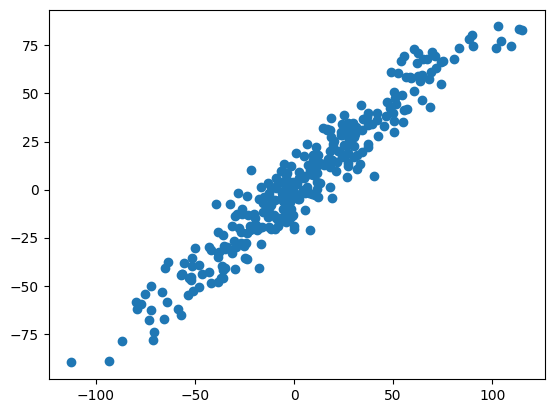

In [56]:
regressor = KNeighborsRegressor(n_neighbors=11, algorithm="ball_tree", weights="uniform")

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

plt.scatter(y_test, y_pred)

plt.show()